In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [32]:
# read csv
df = pd.read_csv("water_potability.csv")

In [33]:
df.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [34]:
# performing EDA
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [35]:
# exploring missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [36]:
# drop our target varibale Potability column from this df and add to another df
# #we will attach this column at the end later on
df_target = df["Potability"]
df = df.drop(["Potability"], axis=1)

In [37]:
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [38]:
# convert df_target to a binary type
df_target = df_target.astype(bool)
df_target.head()

0    False
1    False
2    False
3    False
4    False
Name: Potability, dtype: bool

In [39]:
df_target.value_counts()

Potability
False    1998
True     1278
Name: count, dtype: int64

<Axes: >

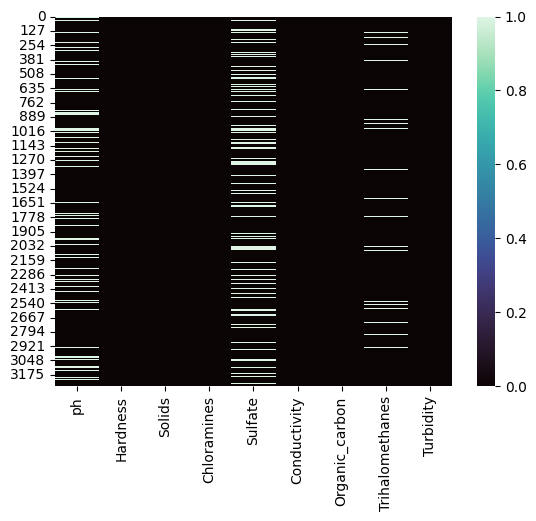

In [40]:
# heatmap
sns.heatmap(df.isnull(), cmap="mako")

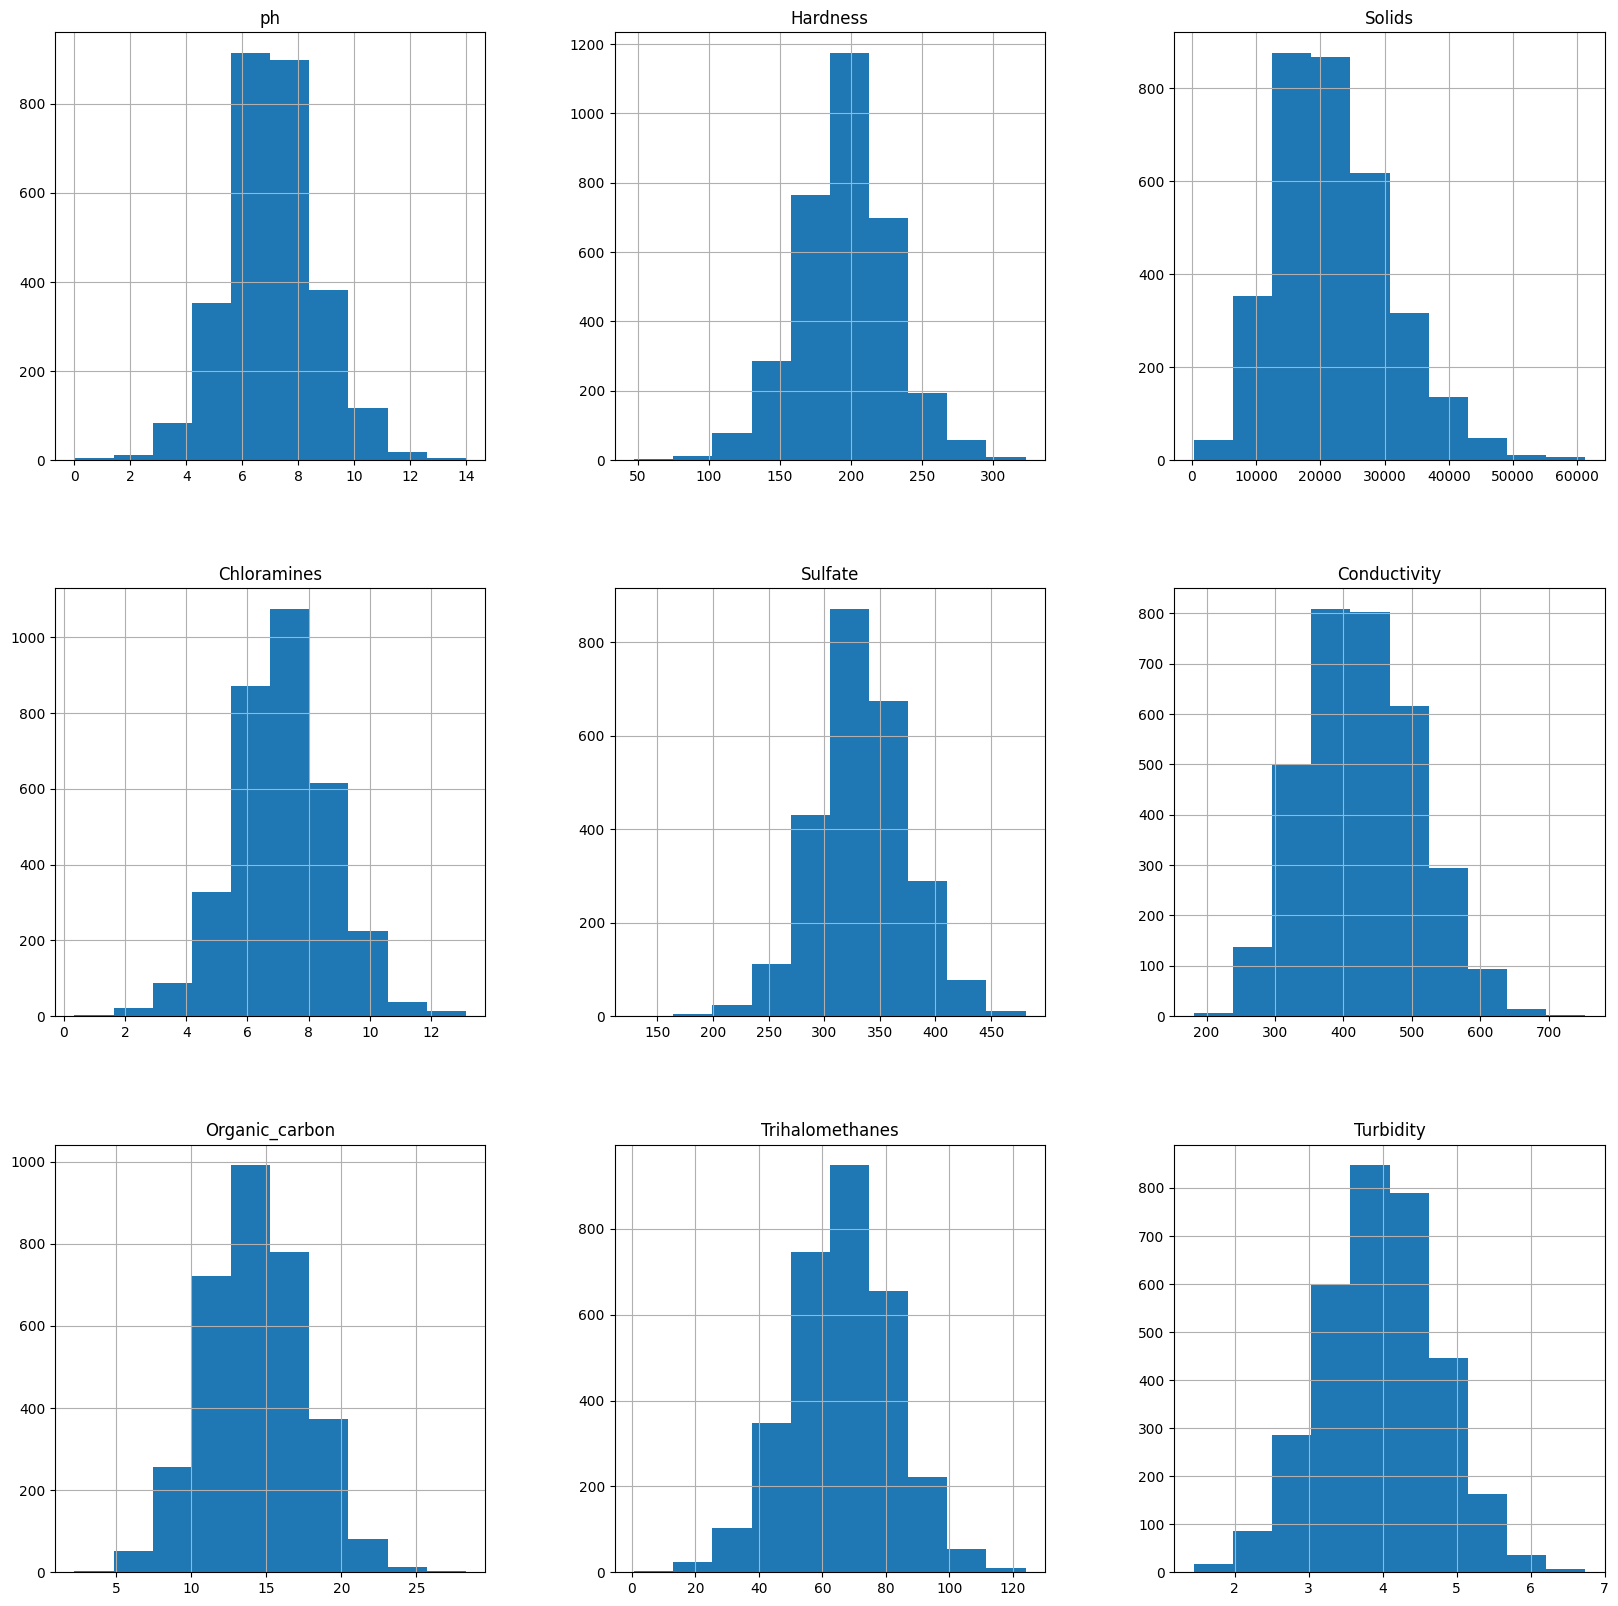

In [41]:
# Visualize key features using histograms, box plots, scatter plots, or other appropriate visualization techniques to identify patterns, and outliers
df.hist(figsize=(20, 20))
plt.show()

ph                    Axes(0.125,0.712609;0.168478x0.167391)
Hardness           Axes(0.327174,0.712609;0.168478x0.167391)
Solids             Axes(0.529348,0.712609;0.168478x0.167391)
Chloramines        Axes(0.731522,0.712609;0.168478x0.167391)
Sulfate               Axes(0.125,0.511739;0.168478x0.167391)
Conductivity       Axes(0.327174,0.511739;0.168478x0.167391)
Organic_carbon     Axes(0.529348,0.511739;0.168478x0.167391)
Trihalomethanes    Axes(0.731522,0.511739;0.168478x0.167391)
Turbidity              Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

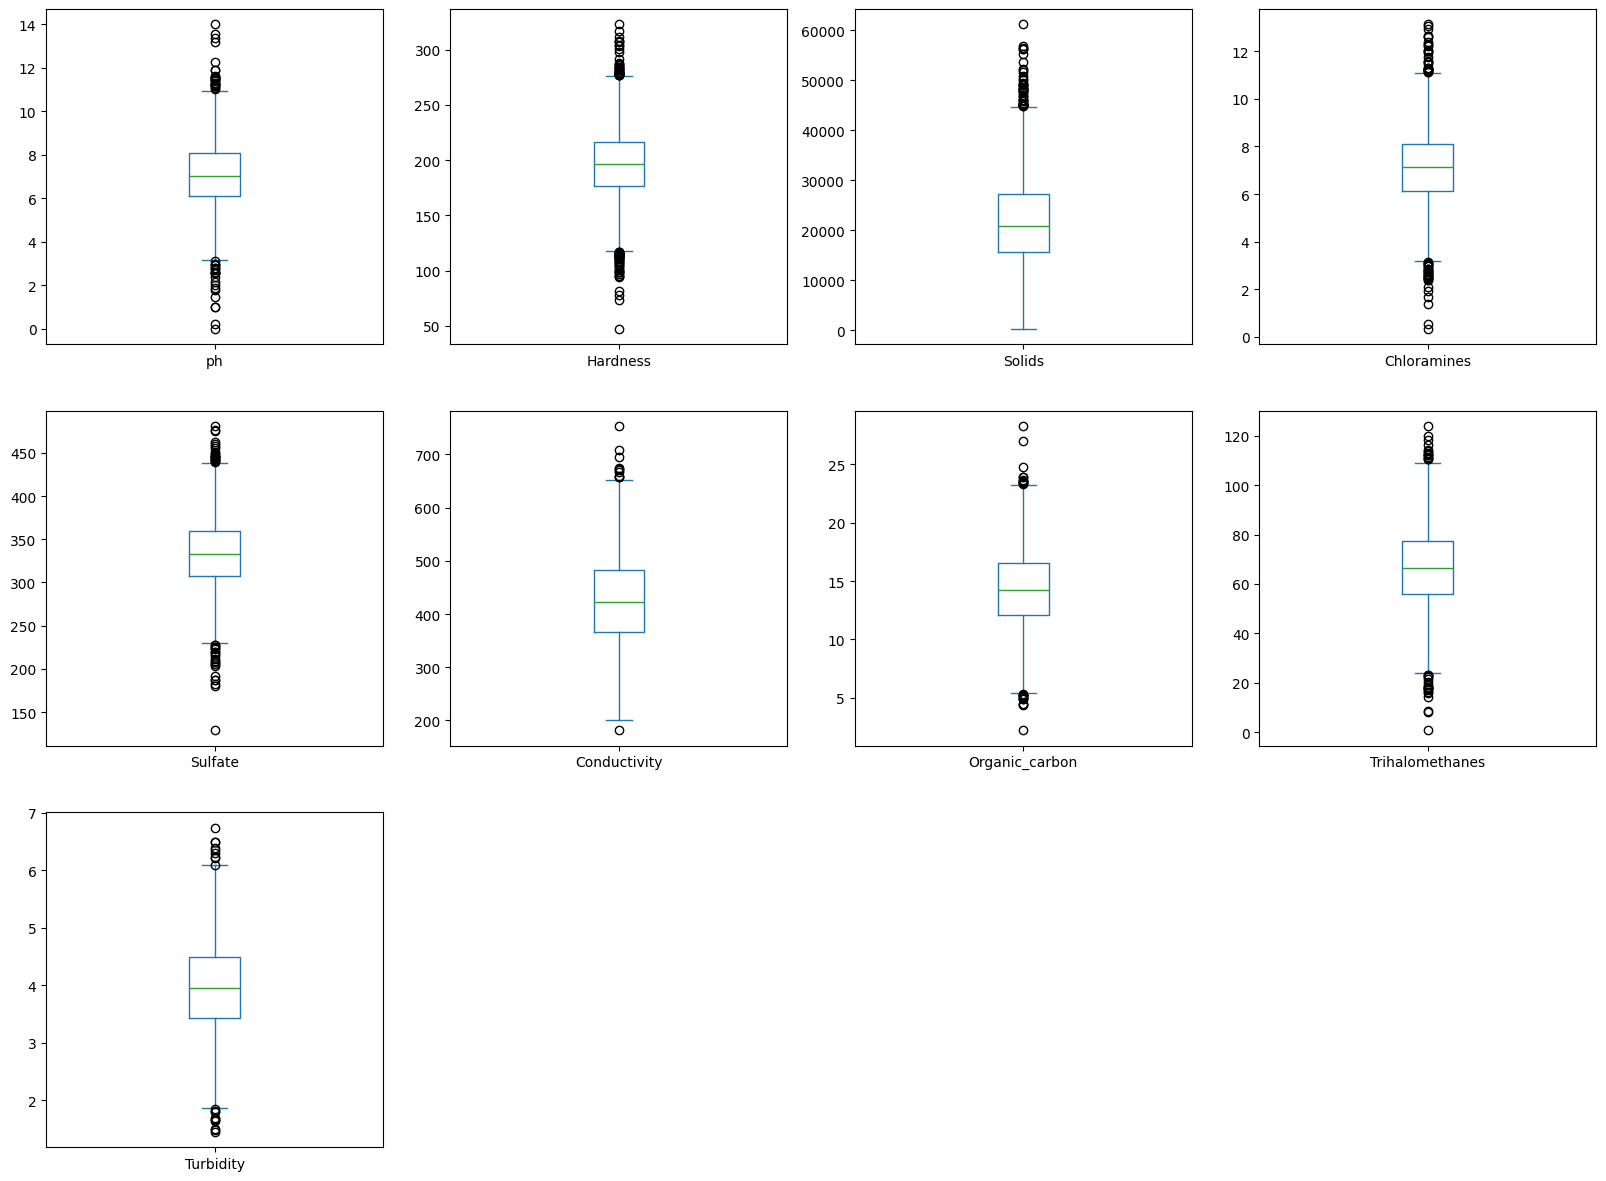

In [42]:
# boxplot of all columns, shown in one plot
df.plot(
    kind="box",
    subplots=True,
    layout=(4, 4),
    sharex=False,
    sharey=False,
    figsize=(20, 20),
)

In [43]:
# interpolate missing values
df.interpolate(method="polynomial", order=2, inplace=True)
# fill border values not catered by interpolation via mean
df.fillna(df.mean(), inplace=True)
# check if there are any missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [44]:
# getting the quartile one and quartile 3 values of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1
IQR

ph                     2.011660
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.355534
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.657377
Turbidity              1.060609
dtype: float64

In [45]:
# if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
# then it is been defined as outlier
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

ph                 60
Hardness           83
Solids             47
Chloramines        61
Sulfate            65
Conductivity       11
Organic_carbon     25
Trihalomethanes    36
Turbidity          19
dtype: int64

In [46]:
# masking the outliers
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3271,False,False,True,False,False,False,False,False,False
3272,False,False,False,False,False,False,False,False,False
3273,False,False,False,False,False,False,False,False,False
3274,False,False,False,False,False,False,False,False,False


In [47]:
# next we will replace the outliers with the median of the column
df = df.mask(mask, df.median(), axis=1)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.052837,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,392.389606,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,388.512838,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,20927.833607,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.292738,392.449580,19.903225,67.459280,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.292738,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.292738,402.883113,11.168946,77.488213,4.708658


In [48]:
# check outliers
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

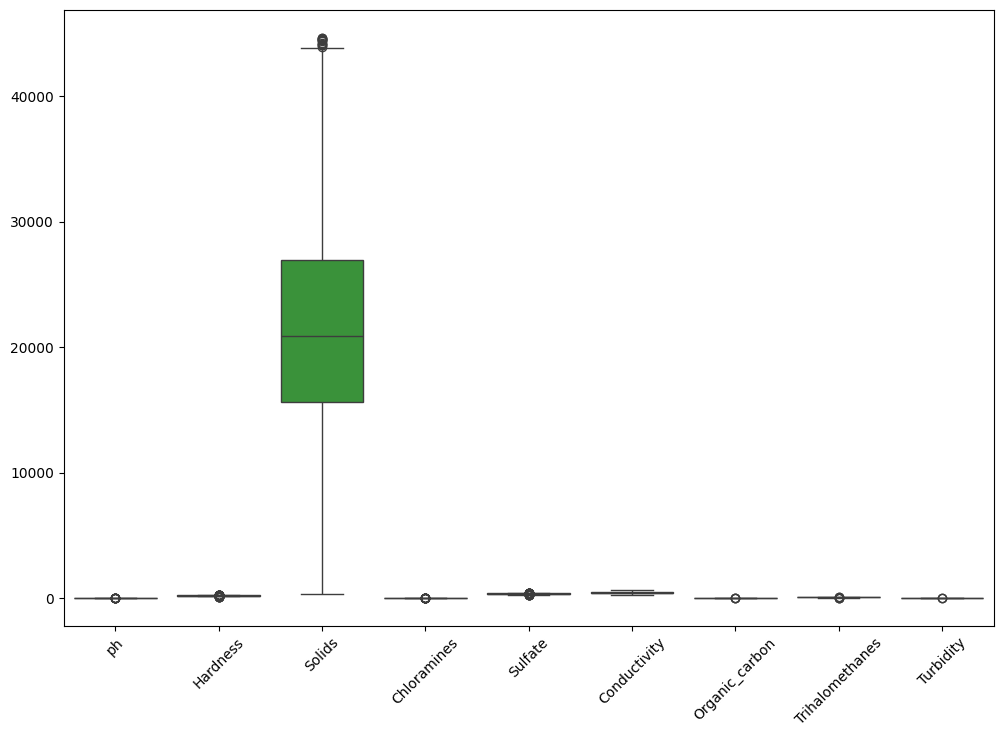

In [49]:
# Plot box plots for summary statistics of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

ph                    Axes(0.125,0.712609;0.168478x0.167391)
Hardness           Axes(0.327174,0.712609;0.168478x0.167391)
Solids             Axes(0.529348,0.712609;0.168478x0.167391)
Chloramines        Axes(0.731522,0.712609;0.168478x0.167391)
Sulfate               Axes(0.125,0.511739;0.168478x0.167391)
Conductivity       Axes(0.327174,0.511739;0.168478x0.167391)
Organic_carbon     Axes(0.529348,0.511739;0.168478x0.167391)
Trihalomethanes    Axes(0.731522,0.511739;0.168478x0.167391)
Turbidity              Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

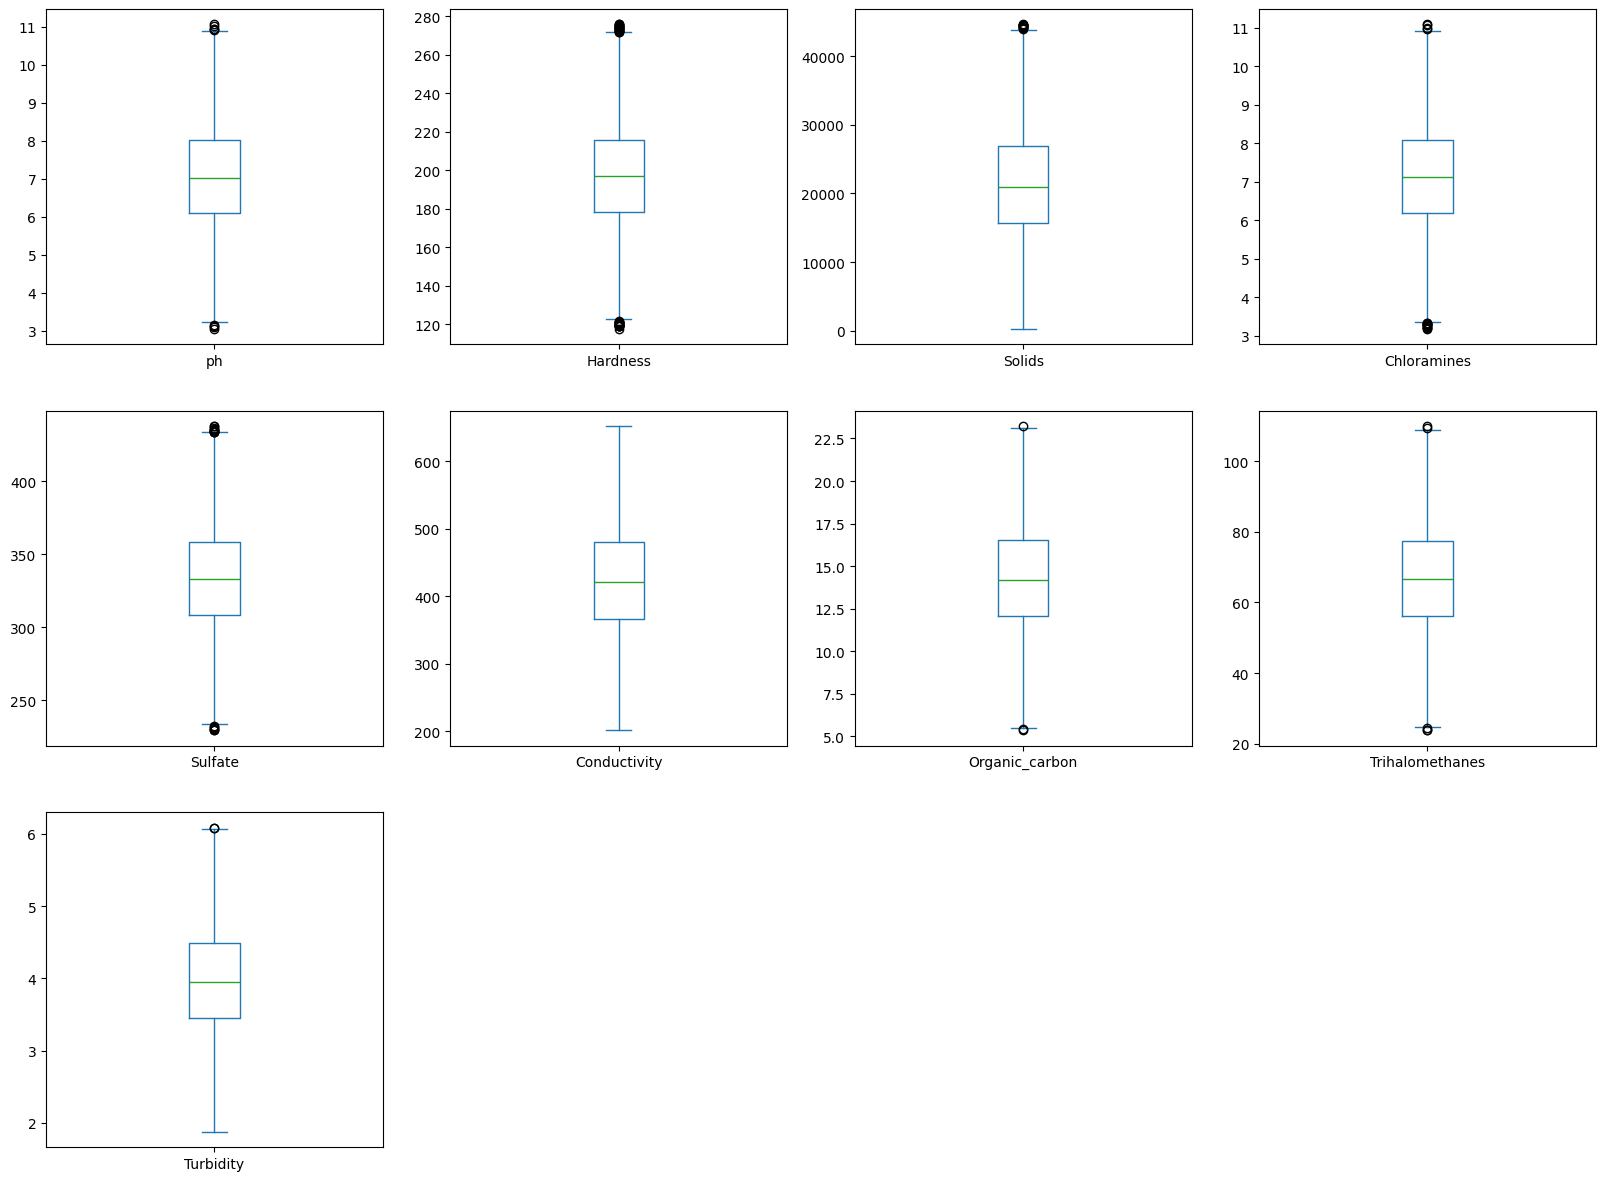

In [50]:
# boxplot of all columns, shown in one plot
df.plot(
    kind="box",
    subplots=True,
    layout=(4, 4),
    sharex=False,
    sharey=False,
    figsize=(20, 20),
)

In [51]:
# Rescale the data
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column] - mean) / std

df.describe()
# In this code, we first calculate the mean and standard deviation of each column,
# then subtract the mean from each value and divide by the standard deviation.
# This transforms the data in each column to have a mean of 0 and a standard deviation of 1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,-2.928061e-17,7.027346e-16,-7.591269e-17,-5.725985e-16,-1.366428e-15,2.407517e-16,6.908054e-16,-4.337868e-18,-4.164353e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.703498e+00,-2.677667e+00,-2.616562e+00,-2.726714e+00,-2.683599e+00,-2.817708e+00,-2.794287e+00,-2.764899e+00,-2.758177e+00
25%,-6.535701e-01,-6.223159e-01,-7.308401e-01,-6.525669e-01,-6.468285e-01,-7.510995e-01,-6.862653e-01,-6.698637e-01,-6.877546e-01
50%,-3.229788e-02,1.525002e-02,-8.468717e-02,4.925898e-03,-1.554597e-02,-4.532446e-02,-2.102912e-02,7.059661e-03,-1.599271e-02
75%,6.448839e-01,6.487345e-01,6.566110e-01,6.591329e-01,6.410094e-01,6.969146e-01,6.988325e-01,6.929658e-01,6.943613e-01
max,2.705174e+00,2.699409e+00,2.830989e+00,2.741485e+00,2.679726e+00,2.857801e+00,2.802339e+00,2.806552e+00,2.787146e+00


In [52]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.007477,0.284718,-0.101113,0.122456,0.897905,1.747301,-1.223078,1.321704,-1.322120
1,-2.260977,-2.282054,-0.366694,-0.337507,1.513228,2.106984,0.280121,-0.661000,0.702493
2,0.699140,0.942700,-0.209468,1.489046,1.413305,-0.086593,0.808915,-0.008480,-1.199923
3,0.846126,0.607248,0.049675,0.647547,0.598137,-0.783130,1.299901,2.185006,0.871194
4,1.369836,-0.524382,-0.446700,-0.398824,-0.606839,-0.340784,-0.854030,-2.234332,0.142087
...,...,...,...,...,...,...,...,...,...
3271,-1.618023,-0.096508,-0.084338,0.030063,0.677071,1.270466,-0.122465,0.008824,0.617118
3272,0.503106,-0.100880,-0.526473,0.648951,-0.009975,-0.415815,1.759201,0.058717,-1.539251
3273,1.590872,-0.705966,1.418236,0.157056,-0.009975,0.082553,-1.016621,0.213012,-0.880016
3274,-1.308264,1.159269,-1.183394,-0.567078,-0.009975,-0.284493,-0.975950,0.707222,0.976391


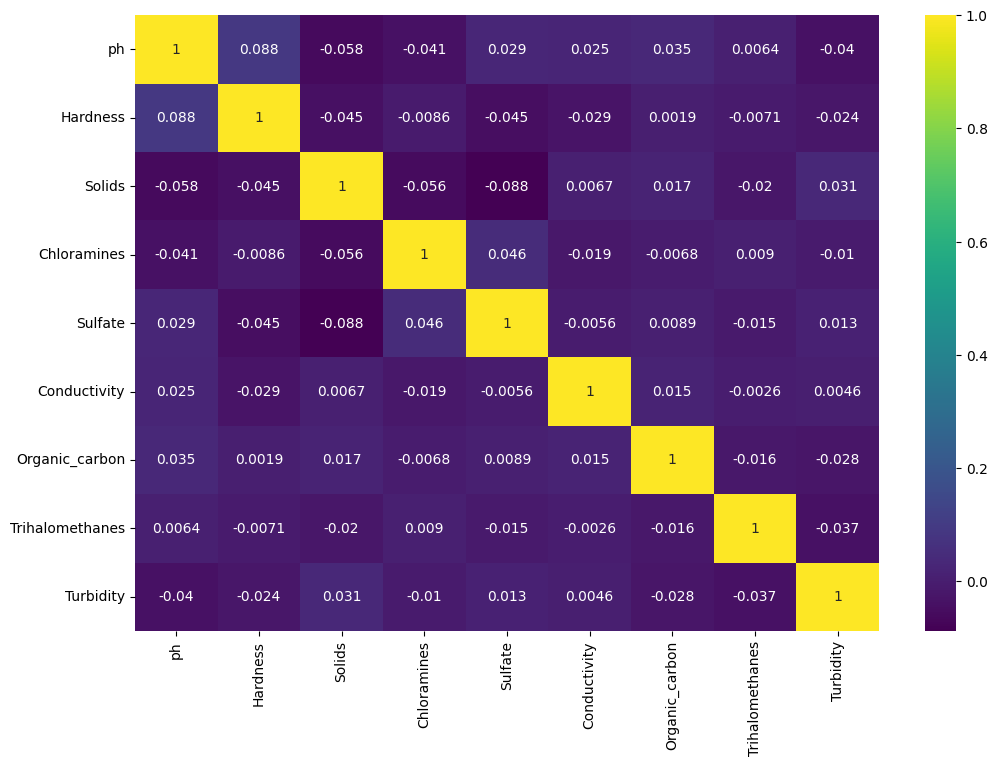

In [53]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

In [54]:
# add the df_target column to df column
df["Potability"] = df_target
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.007477,0.284718,-0.101113,0.122456,0.897905,1.747301,-1.223078,1.321704,-1.322120,False
1,-2.260977,-2.282054,-0.366694,-0.337507,1.513228,2.106984,0.280121,-0.661000,0.702493,False
2,0.699140,0.942700,-0.209468,1.489046,1.413305,-0.086593,0.808915,-0.008480,-1.199923,False
3,0.846126,0.607248,0.049675,0.647547,0.598137,-0.783130,1.299901,2.185006,0.871194,False
4,1.369836,-0.524382,-0.446700,-0.398824,-0.606839,-0.340784,-0.854030,-2.234332,0.142087,False
...,...,...,...,...,...,...,...,...,...,...
3271,-1.618023,-0.096508,-0.084338,0.030063,0.677071,1.270466,-0.122465,0.008824,0.617118,True
3272,0.503106,-0.100880,-0.526473,0.648951,-0.009975,-0.415815,1.759201,0.058717,-1.539251,True
3273,1.590872,-0.705966,1.418236,0.157056,-0.009975,0.082553,-1.016621,0.213012,-0.880016,True
3274,-1.308264,1.159269,-1.183394,-0.567078,-0.009975,-0.284493,-0.975950,0.707222,0.976391,True


In [55]:
def split_data(df, test_size=0.2):
    # Shuffle the data
    df = df.sample(frac=1).reset_index(drop=True)

    # Calculate the index at which to split the data
    split_idx = int(len(df) * (1 - test_size))

    # Split the data
    train_df = df.loc[:split_idx]
    test_df = df.loc[split_idx:]

    return train_df, test_df


# Use the function to split the data
train_df, test_df = split_data(df, test_size=0.2)
scikit_train_df, scikit_test_df = split_data(df, test_size=0.2)

# For deep learning model, split the training data into training and validation sets
train_df, val_df = split_data(
    train_df, test_size=0.25
)  # 0.25 x 0.8 = 0.2, so 60% data is used for training

In [56]:
scikit_train_df.shape, scikit_test_df.shape

((2621, 10), (656, 10))

(656,)
Accuracy : 0.6265243902439024


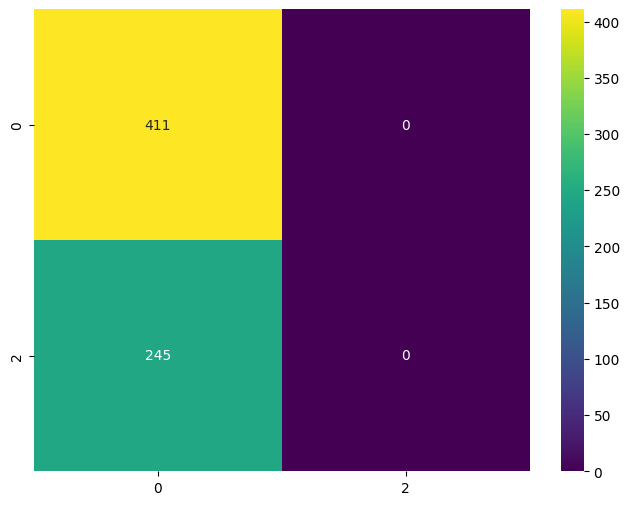

In [58]:
# import logistic regression model from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the scikit train data above
model.fit(scikit_train_df.drop("Potability", axis=1), scikit_train_df["Potability"])

# Make predictions using the scikit test data above
predictions = model.predict(scikit_test_df.drop("Potability", axis=1))
print(predictions.shape)

# Calculate the accuracy of the model
accuracy = accuracy_score(scikit_test_df["Potability"], predictions)
print("Accuracy :", accuracy)


# confusion matrix
conf_matrix = confusion_matrix(scikit_test_df["Potability"], predictions.round())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d")

# Format the annotation to integers
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

In [59]:
# Create a classification report
class_report = classification_report(scikit_test_df["Potability"], predictions)
print(class_report)

              precision    recall  f1-score   support

       False       0.63      1.00      0.77       411
        True       0.00      0.00      0.00       245

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\Hp\anaconda3\envs\deep\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\envs\deep\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\envs\deep\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(656,)
Accuracy : 0.6646341463414634


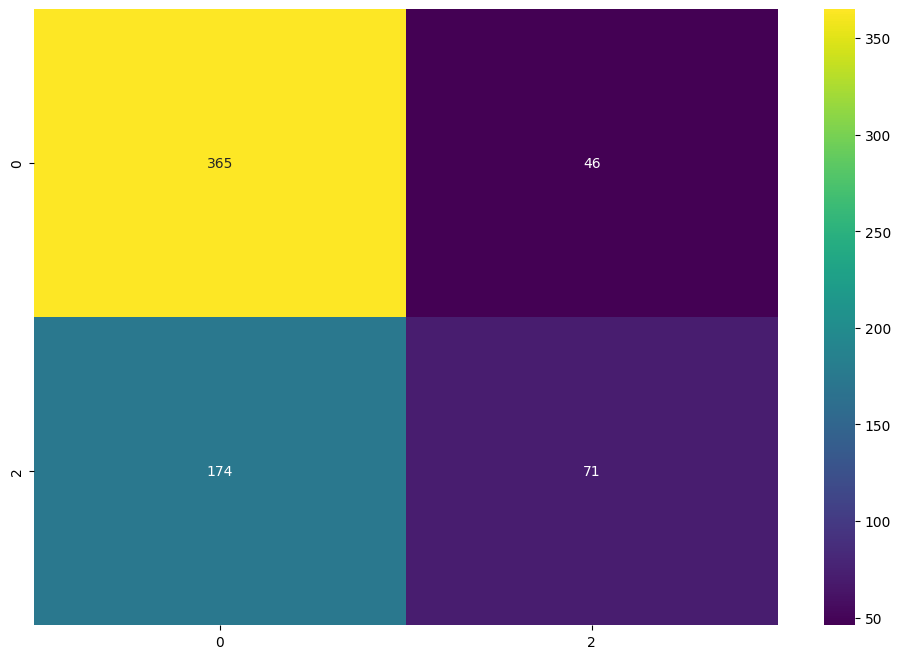

In [60]:
# now we will use the random forest model
# Create a random forest model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
)
# Train the model using the scikit train data above
rf_model.fit(scikit_train_df.drop("Potability", axis=1), scikit_train_df["Potability"])

# Make predictions using the scikit test data above
rf_predictions = rf_model.predict(scikit_test_df.drop("Potability", axis=1))
print(rf_predictions.shape)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(scikit_test_df["Potability"], rf_predictions.round())
print("Accuracy :", rf_accuracy)

# confusion matrix
rf_conf_matrix = confusion_matrix(scikit_test_df["Potability"], rf_predictions.round())
plt.figure(figsize=(12, 8))
sns.heatmap(rf_conf_matrix, annot=True, cmap="viridis", fmt="d")

# Format the annotation to integers
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

PYTORCH


In [61]:
# import pytorch
import torch
import torch.nn as nn
import torch.optim as optim

In [62]:
# choose features and target variables
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [75]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
print(X_tensor.shape, y_tensor.shape)

torch.Size([3276, 9]) torch.Size([3276, 1])


In [220]:
# For deep learning model you have to split the data into three parts. First split the data
# into training and testing part. Then split the new training (after split) part into training
# and validation. Split ratio is up to you but overall training data atleast contain 60% of the
# data.
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

print(X_train.shape, X_val.shape, X_test.shape)

torch.Size([1965, 9]) torch.Size([655, 9]) torch.Size([656, 9])


In [221]:
# You have to modify the model as instructed in the instructions.
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc2(x))
        return x


# Initialize the model
input_size = X_train.shape[1]
hidden_size = 64  # adjust as needed
model = ANN(input_size, hidden_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=0.001,
    #    ,   weight_decay=0.01
)

In [222]:
# Training the model with validation
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Validation
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(
            f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}"
        )

# Evaluation
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_train = torch.round(
        y_pred_train
    )  # round the output to get binary predictions
    train_accuracy = accuracy_score(y_train.numpy(), y_pred_train.numpy())

    y_pred_val = model(X_val)
    y_pred_val = torch.round(y_pred_val)  # round the output to get binary predictions
    validation_accuracy = accuracy_score(y_val.numpy(), y_pred_val.numpy())

    y_pred_test = model(X_test)
    y_pred_test = torch.round(y_pred_test)  # round the output to get binary predictions
    test_accuracy = accuracy_score(y_test.numpy(), y_pred_test.numpy())

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    validation_accuracy = accuracy_score(y_val, y_pred_val)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch [10/100], Train Loss: 0.6657, Val Loss: 0.6654
Epoch [20/100], Train Loss: 0.6553, Val Loss: 0.6571
Epoch [30/100], Train Loss: 0.6438, Val Loss: 0.6490
Epoch [40/100], Train Loss: 0.6294, Val Loss: 0.6402
Epoch [50/100], Train Loss: 0.6143, Val Loss: 0.6314
Epoch [60/100], Train Loss: 0.6018, Val Loss: 0.6258
Epoch [70/100], Train Loss: 0.5928, Val Loss: 0.6235
Epoch [80/100], Train Loss: 0.5852, Val Loss: 0.6229
Epoch [90/100], Train Loss: 0.5775, Val Loss: 0.6230
Epoch [100/100], Train Loss: 0.5695, Val Loss: 0.6229
Train Accuracy: 0.705852417302799
Validation Accuracy: 0.6534351145038167
Test Accuracy: 0.663109756097561


<Axes: >

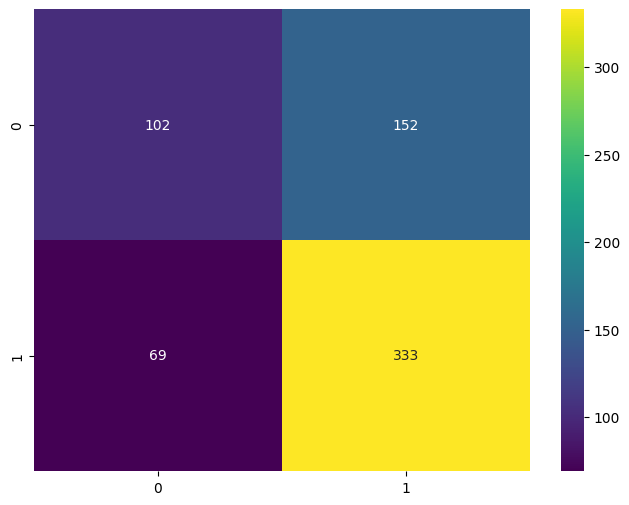

In [223]:
# confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_test, labels=[1, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d")